<b><h1> Analysis for FreeRadius (vAAA)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import matplotlib
import numpy as np
#sns.set(font_scale=1.3, style="ticks")

In [11]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

<b>Read result File

In [12]:
#df = pd.read_csv("/home/arif/gitRepos/ah-tng-bench-experiments/results-archive/vaaa_results_20191126_second_run/result_ec_metrics.csv")
df = pd.read_csv("/Users/arifhossen/ArifDevelopmentWork/gitRepos/ah-tng-bench-experiments/results-archive/20191205_1000_run_result/result_ec_metrics.csv")

In [13]:
df

,Unnamed: 0,experiment_name,experiment_start,experiment_stop,metric__mp.input.vdu01.0__FreeRADIUS-Total-Access-Accepts,metric__mp.input.vdu01.0__FreeRADIUS-Total-Access-Rejects,metric__mp.input.vdu01.0__FreeRADIUS-Total-Access-Requests,metric__mp.input.vdu01.0__FreeRADIUS-Total-Auth-Responses,metric__mp.input.vdu01.0__stat__data__collisions,metric__mp.input.vdu01.0__stat__data__multicast,...,param__func__mp.input__mem_swap_max,param__header__all__config_id,param__header__all__repetition,param__header__all__time_limit,param__header__all__time_warmup,param__mp__mp.input__address,param__mp__mp.input__connection_point,param__mp__mp.input__container,param__mp__mp.input__name,run_id
0,0,vAAA1_00000,2019-12-06 01:04:55.527767,2019-12-06 01:05:55.585076,51923,106,52286,52029,0.0,0.0,...,NaN,0,0,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,0
1,1,vAAA1_00001,2019-12-06 01:06:23.332125,2019-12-06 01:07:23.393286,51794,106,52157,51900,0.0,0.0,...,NaN,0,1,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,1
2,2,vAAA1_00002,2019-12-06 01:07:51.544248,2019-12-06 01:08:51.605296,50028,104,50389,50132,0.0,0.0,...,NaN,0,2,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,2
3,3,vAAA1_00003,2019-12-06 01:09:19.479041,2019-12-06 01:10:19.534714,51673,106,52036,51779,0.0,0.0,...,NaN,0,3,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,3
4,4,vAAA1_00004,2019-12-06 01:10:47.517899,2019-12-06 01:11:47.579218,49896,106,50259,50002,0.0,0.0,...,NaN,0,4,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,4
5,5,vAAA1_00005,2019-12-06 01:12:15.323509,2019-12-06 01:13:15.386294,51749,106,52112,51855,0.0,0.0,...,NaN,0,5,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,5
6,6,vAAA1_00006,2019-12-06 01:13:44.379593,2019-12-06 01:14:44.439967,49830,106,50193,49936,0.0,0.0,...,NaN,0,6,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,6
7,7,vAAA1_00007,2019-12-06 01:15:12.332159,2019-12-06 01:16:12.392257,49217,106,49580,49323,0.0,0.0,...,NaN,0,7,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,7
8,8,vAAA1_00008,2019-12-06 01:16:40.615572,2019-12-06 01:17:40.675631,50680,106,51043,50786,0.0,0.0,...,NaN,0,8,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,8
9,9,vAAA1_00009,2019-12-06 01:18:08.583648,2019-12-06 01:19:08.644013,52471,106,52834,52577,0.0,0.0,...,NaN,0,9,60,10,20.0.0.1/24,ns:input,arif332/tng-bench-mp,mp.input,9


In [14]:
df.columns.tolist()

['Unnamed: 0',
 'experiment_name',
 'experiment_start',
 'experiment_stop',
 'metric__mp.input.vdu01.0__FreeRADIUS-Total-Access-Accepts',
 'metric__mp.input.vdu01.0__FreeRADIUS-Total-Access-Rejects',
 'metric__mp.input.vdu01.0__FreeRADIUS-Total-Access-Requests',
 'metric__mp.input.vdu01.0__FreeRADIUS-Total-Auth-Responses',
 'metric__mp.input.vdu01.0__stat__data__collisions',
 'metric__mp.input.vdu01.0__stat__data__multicast',
 'metric__mp.input.vdu01.0__stat__data__rx_bytes',
 'metric__mp.input.vdu01.0__stat__data__rx_compressed',
 'metric__mp.input.vdu01.0__stat__data__rx_crc_errors',
 'metric__mp.input.vdu01.0__stat__data__rx_dropped',
 'metric__mp.input.vdu01.0__stat__data__rx_errors',
 'metric__mp.input.vdu01.0__stat__data__rx_fifo_errors',
 'metric__mp.input.vdu01.0__stat__data__rx_frame_errors',
 'metric__mp.input.vdu01.0__stat__data__rx_length_errors',
 'metric__mp.input.vdu01.0__stat__data__rx_missed_errors',
 'metric__mp.input.vdu01.0__stat__data__rx_nohandler',
 'metric__mp.i

In [15]:
vaaa_map_01 = {
    "param__func__mp.input__cmd_start": "req_size",
    "param__func__de.upb.vAAA.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.vAAA.0.1__mem_max": "memory",
    "param__func__mp.input__cpu_bw": "probe_cpu_bw",
    "metric__vnf0.vdu01.0__FreeRADIUS-Total-Auth-Responses": "Radius-Auth-Response",
    "metric__mp.input.vdu01.0__FreeRADIUS-Total-Auth-Responses": "Probe-Radius-Auth-Response",
    #"param__func__mp.input__mem_max": "probe_memory",
    #"metric__mp.input.vdu01.0__ab_total_transfer_byte": "transf_bytes",
    #"metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "req_transf_rate",
    "metric__vnf0.vdu01.0__stat__input__rx_bytes": "if_rx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__rx_dropped": "if_in_rx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__rx_errors": "if_in_rx_errors",
    #"metric__vnf0.vdu01.0__stat__input__rx_packets": "if_in_rx_packets",
    "metric__vnf0.vdu01.0__stat__input__tx_bytes": "if_tx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__tx_dropped": "if_in_tx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__tx_errors": "if_in_tx_errors",
    #"metric__vnf0.vdu01.0__stat__input__tx_packets": "if_in_tx_packets",
}


In [16]:
def cleanup(df):
    """
    Cleanup of df data.
    Dataset specific.
    """
    def _replace(df, column, str1, str2):
        if column in df:
            df[column] = df[column].str.replace(str1, str2)
            
    def _to_num(df, column):
        if column in df:
            df[column] = pd.to_numeric(df[column])
        
    #_replace(df, "req_size", "ab -c 1 -t 60 -n 9999 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "-")


In [17]:
df["vnf"] = "vaaa"

dfs_raw = [df]
map_list = [vaaa_map_01]
dfs = list()  # clean data frames

for (df, m) in zip(dfs_raw, map_list):
    tmp = select_and_rename(df.copy(), m)
    #cleanup(tmp)
    dfs.append(tmp)

#dfs[0].head()


In [18]:
df01 = select_and_rename(df, vaaa_map_01)


In [19]:
df01.head()

,req_size,cpu_bw,memory,probe_cpu_bw,Radius-Auth-Response,Probe-Radius-Auth-Response,if_rx_bytes,if_tx_bytes
0,./start.sh,0.1,128,1.0,55264,52029,4820996.0,3489424.0
1,./start.sh,0.1,128,1.0,55055,51900,4800865.0,3474854.0
2,./start.sh,0.1,128,1.0,53394,50132,4659254.0,3372120.0
3,./start.sh,0.1,128,1.0,55196,51779,4816725.0,3486284.0
4,./start.sh,0.1,128,1.0,53180,50002,4638576.0,3357344.0


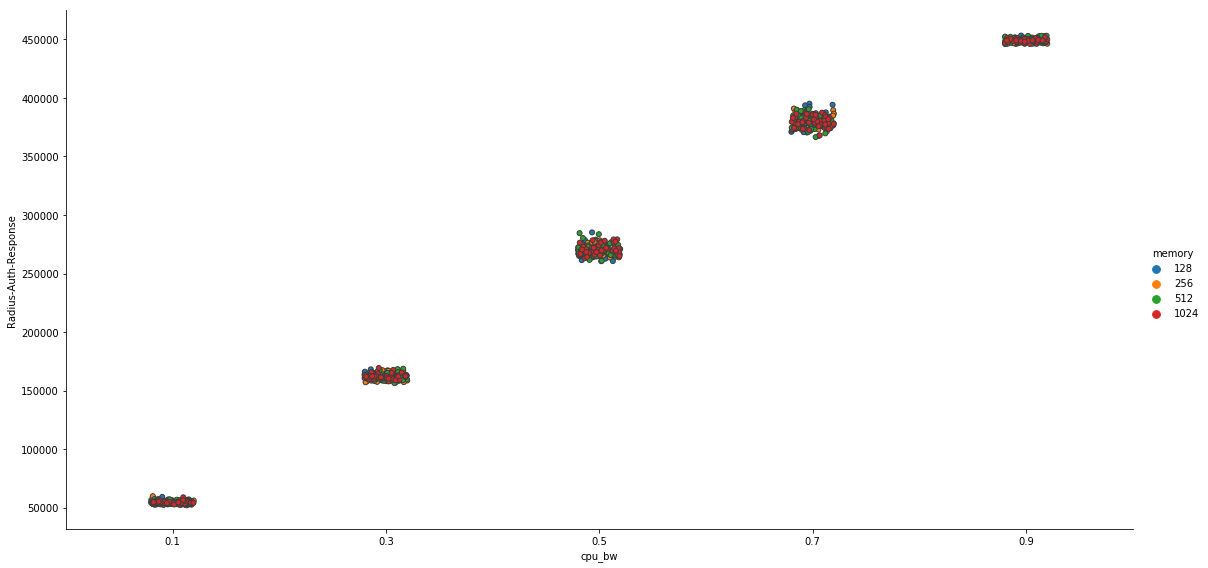

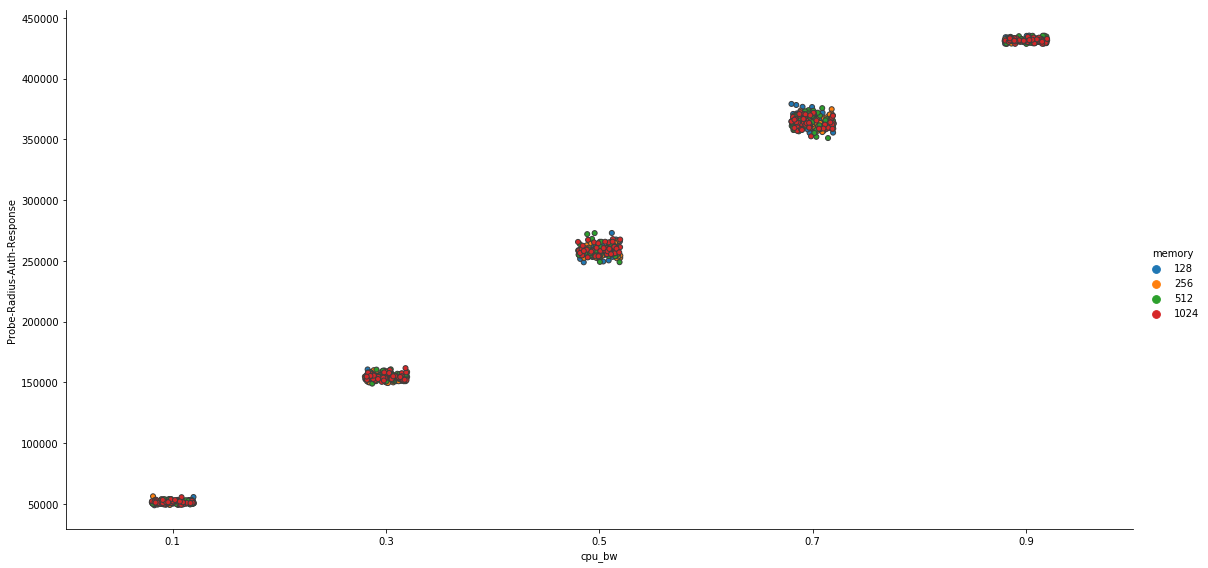

In [24]:
metrics =  ["Radius-Auth-Response", "Probe-Radius-Auth-Response"]
hue_col = "memory"
x_col = "cpu_bw"

#dff = df01.loc[df01["memory"] == 1024]
#dff = dff.loc[dff["ruleset"] == "big"]
#dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.catplot(x=x_col, y=m, hue=hue_col, data=df01, kind="strip", height=8, aspect=2, linewidth=1)

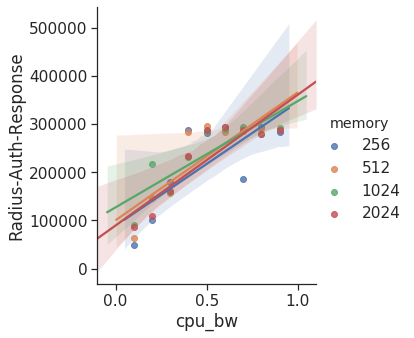

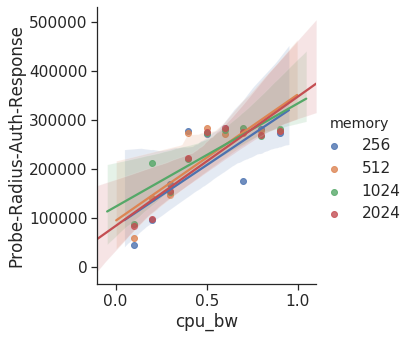

In [81]:
metrics =  ["Radius-Auth-Response", "Probe-Radius-Auth-Response"]
hue_col = "memory"
x_col = "cpu_bw"

#dff = df01.loc[df01["memory"] == 1024]
#dff = dff.loc[dff["ruleset"] == "big"]
#dff = dff.loc[dff[x_col] >= .5]

for m in metrics:
    sns.lmplot(x=x_col, y=m, hue=hue_col, data=df01)